In [89]:
# Importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Importing data set from seaboarn

df = sns.load_dataset('titanic')

In [91]:
# First ten rows of the data set 

df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [92]:
# No of rows and columns of the data set 

df.shape

(891, 15)

In [93]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
# Counting the number of survival 

df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

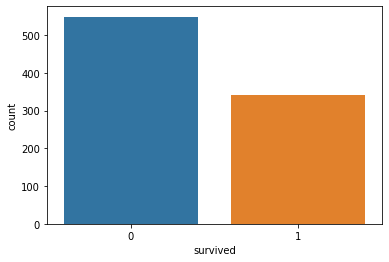

In [95]:
# Visulising the no of survivals

sns.countplot(x = df['survived'])
plt.show()

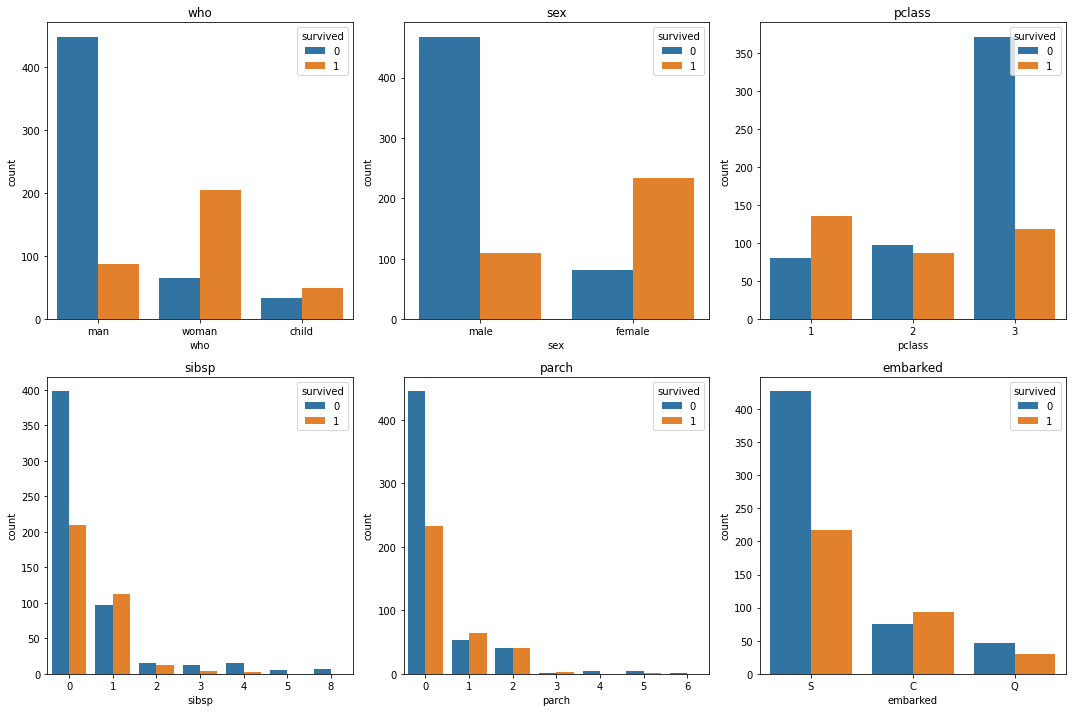

In [96]:
# Visulising the columns 'who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked'

cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows  = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (15,10))

for r in range(n_rows):
    for c in range(n_cols):
        
        i = r*n_cols + c  # Index to go throgh each columns
        ax = axs[r][c]    # Show where to position each sub plots 
        sns.countplot(x = df[cols[i]], hue = df['survived'], ax = ax)
        ax.set_title(cols[i])
        ax.legend(title = 'survived', loc = 'upper right')
plt.tight_layout()

In [97]:
# Survival rate on the basis of gender 

df.groupby('sex').mean()['survived']*100 

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

#### Hence female has ~ 75% chance of survival while male has only ~19%

In [98]:
# Survival rate on the basis of sex and class 
# Method 1

df.groupby(['sex','class']).mean()['survived']

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [99]:
# Method 2

df.pivot_table('survived', index = 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### Hence female having first class are more likely to survived and male having third class are more likely to not survived

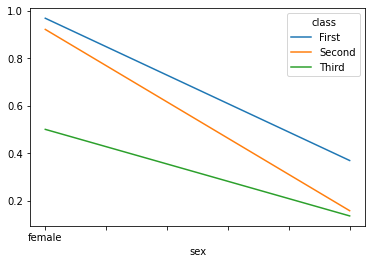

In [100]:
# Survival rate on the basis of sex and class visually 

df.pivot_table('survived', index = 'sex', columns = 'class').plot()
plt.show()

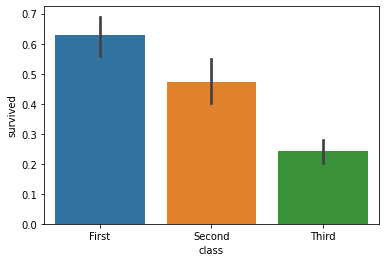

In [101]:
sns.barplot(x = 'class', y = 'survived', data = df)
plt.show()

In [102]:
# Survival rate on the basis of age sex class

age = pd.cut(df['age'], [0,18,80])

df.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

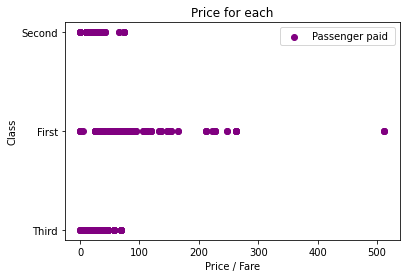

In [103]:
# Price paid for each class

plt.scatter(df['fare'], df['class'], color = 'purple', label = 'Passenger paid ')
plt.xlabel('Price / Fare')
plt.ylabel('Class')
plt.title('Price for each')
plt.legend()
plt.show()

In [104]:
# number of missing vakue of each columns 

df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [105]:
# Count the values of each columns 

for val in df:
    print(val.upper())
    print()
    print(df[val].value_counts())
    print('\n')
    print()

SURVIVED

0    549
1    342
Name: survived, dtype: int64



PCLASS

3    491
1    216
2    184
Name: pclass, dtype: int64



SEX

male      577
female    314
Name: sex, dtype: int64



AGE

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64



SIBSP

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64



PARCH

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64



FARE

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64



EMBARKED

S    644
C    168
Q     77
Name: embarked, dtype: int64



CLASS

Third     491
First     216
Second    184
Name: class, dtype: int64



WHO

man      537
woman    271
child     83
Name: who, dtype: int64



ADULT_MALE

True     5

In [106]:
# Removing rows of mssing values 

df = df.dropna(subset = ['age', 'embarked'])

In [107]:
# Droping some coreated columns 

df = df.drop(['deck', 'embark_town', 'alone', 'who', 'adult_male', 'alive','class'], axis = 1)

In [108]:
df.shape

(712, 8)

In [110]:
df.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [112]:
# Printing the unoque value in the columns 


print(df['sex'].unique())
print(df['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [114]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# Encoding the sex column
df.iloc[:,2] = labelencoder.fit_transform(df.iloc[:,2].values)

# Encoding the embarked column
df.iloc[:,7] = labelencoder.fit_transform(df.iloc[:,7].values)

In [115]:
# Encoded values of the columns
print(df['sex'].unique())
print(df['embarked'].unique())

[1 0]
[2 0 1]


In [116]:
df.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
dtype: object

In [118]:
# Split the data into independent 'X' and dependent 'Y'

X = df.drop('survived', axis = 1).values
Y = df['survived'].values

In [122]:
# Scaled the data to avoid some variable to dominates

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [123]:
# Spliting the data into train test split

from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [167]:
# Creat a function with many machine leraning models 

def models(X_train, Y_train):
    
    #Logistic regression 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(solver = 'lbfgs')
    log.fit(X_train,Y_train)
    
    # Use KNeighbors 
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski', p =2)
    knn.fit(X_train,Y_train)
    
    #Use SVC (linear model)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0, gamma = 'auto')
    svc_lin.fit(X_train,Y_train)
    
    # Use SVc (RBF Kernal)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0, gamma = 'auto')
    svc_rbf.fit(X_train,Y_train)
    
    # Use gaussianNB
    from sklearn.naive_bayes import GaussianNB
    guss = GaussianNB()
    guss.fit(X_train,Y_train)
    
    # Use decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train,Y_train)
    
    # Use Random forest 
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=  10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train,Y_train)
    
    
    # Print the training accuracy score
    print('[0] Logistic Regression Score : ', log.score(X_train,Y_train))
    print('[1] K Neighbors Score : ', knn.score(X_train,Y_train))
    print('[2] SVM (Linear) Score : ', svc_lin.score(X_train,Y_train))
    print('[3] SVM (RBF) Score : ', svc_rbf.score(X_train,Y_train))
    print('[4] Guassian NB Score : ', guss.score(X_train,Y_train))
    print('[5] Decision tree : ', tree.score(X_train,Y_train))
    print('[6] Rndom forest :', forest.score(X_train,Y_train))
    
    
    return log, knn, svc_lin, svc_rbf, guss, tree, forest

In [168]:
models = models(X_train,Y_train)

[0] Logistic Regression Score :  0.7978910369068541
[1] K Neighbors Score :  0.8629173989455184
[2] SVM (Linear) Score :  0.7768014059753954
[3] SVM (RBF) Score :  0.8506151142355008
[4] Guassian NB Score :  0.8031634446397188
[5] Decision tree :  0.9929701230228472
[6] Rndom forest : 0.9753954305799648


In [170]:
from sklearn.metrics import confusion_matrix

for i in range(len(models)):
    cm = confusion_matrix(Y_test, models[i].predict(X_test))
    
    # Extract TN, FP, FN, TP 
    TN, FP, FN, TP = confusion_matrix(Y_test, models[i].predict(X_test)).ravel()
    
    test_score = ( TP +TN ) / ( TP + TN + FP + FN )
    
    print(cm)
    print('Model [{}] Testing Accuracy = "{}"'.format(i, test_score))
    print()

[[73  9]
 [18 43]]
Model [0] Testing Accuracy = "0.8111888111888111"

[[71 11]
 [20 41]]
Model [1] Testing Accuracy = "0.7832167832167832"

[[70 12]
 [18 43]]
Model [2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model [3] Testing Accuracy = "0.7972027972027972"

[[69 13]
 [23 38]]
Model [4] Testing Accuracy = "0.7482517482517482"

[[60 22]
 [10 51]]
Model [5] Testing Accuracy = "0.7762237762237763"

[[67 15]
 [14 47]]
Model [6] Testing Accuracy = "0.7972027972027972"



In [174]:
# Get features importance 
forest = models[6]
importances = pd.DataFrame({'feature': df.iloc[:,1:8].columns, 'importance': np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


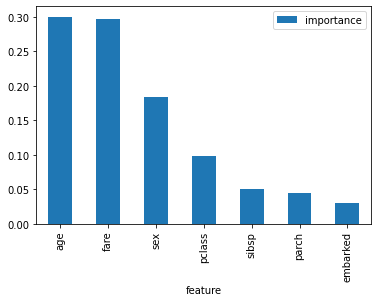

In [176]:
importances.plot.bar()
plt.show()

In [178]:
pred = models[6].predict(X_test)
print(pred)
print()
print(Y_test)

[1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [192]:
# My survival
my_survival = [[1,  0, 29, 1, 1, 500, 0]]

# Scaling my survival
my_survival_scaled = sc.fit_transform(my_survival)

# Printing my survival using random forest calssifier

pred = models[6].predict(my_survival_scaled)
print(pred)


if pred == 0:
    print( 'Oh No ! You did not make it')
else:
    print('Nice ! You are survived ')

[0]
Oh No ! You did not make it
